# Analysis on data aquired

<p>In this notebook we analyze the data parse from all source found in order to explain how during this COVID-19 epidemic the country around the world have performed testo to found infect.<br>
First of all we rerun our notebook to reimport all data with the update.
</p>

[WinError 2] The system cannot find the file specified: 'data'
C:\Users\Eric Boccati\OneDrive\Università\Data science for business\project\data


D:\Programmi\Anaconda\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


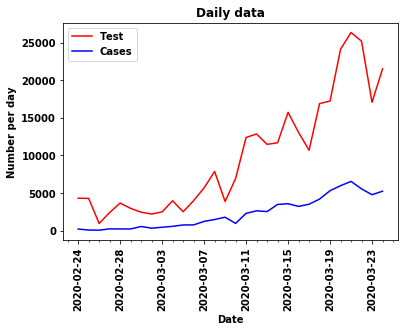

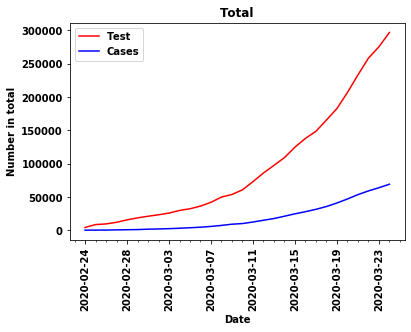

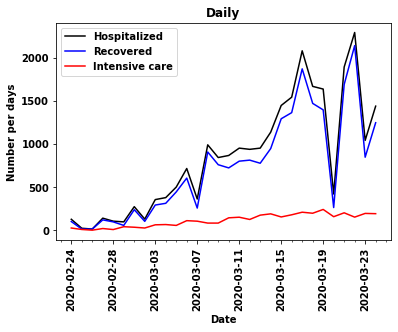

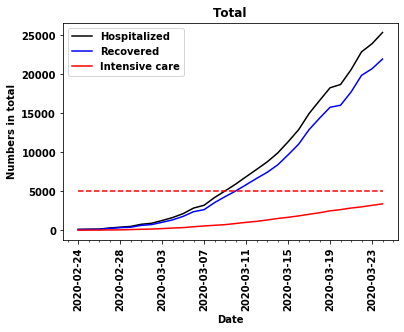

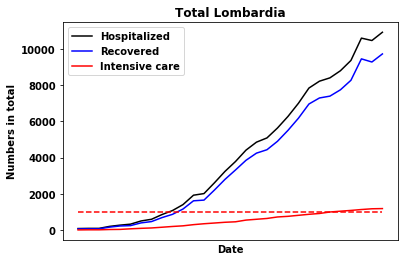

C:\Users\Eric Boccati\OneDrive\Università\Data science for business\project


In [10]:
%cd data
%run italy_data.ipynb
%run usa_data.ipynb
%run uk_data.ipynb
%run brazil_data.ipynb
%run south_korea_data.ipynb
%run indonesia_data.ipynb
%run india_data.ipynb
%cd ..

<p>Then we import dataset from csv created with the data</p>

In [37]:
#setup enviroment
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
import matplotlib.ticker as tkr

#path to folder containing csv
path_of_dataset = os.getcwd() + "/data/parsed_data/"
path_of_dataset = path_of_dataset.replace("/",os.path.sep)

#supported country of our research
supported_country = ["italy","usa","brazil","indonesia","south_korea","united_kingdom","india"]

country_dataset_array = {}

#import all national dataset
for country in  supported_country:
    country_dataset = pd.read_csv(path_of_dataset + country + os.path.sep + country + ".csv",index_col=0)
    country_dataset_array[country] = country_dataset

#import all italian region dataset
path_of_italian_dataset = path_of_dataset + "italy/*.csv"
path_of_italian_dataset = path_of_italian_dataset.replace("/",os.path.sep)
italian_region_csv = glob.glob(path_of_italian_dataset)
italian_region_csv.remove(path_of_dataset + "italy" + os.path.sep + "italy.csv")

italian_region_dataset_array = {}
for region_csv in italian_region_csv:
    regional_dataset = pd.read_csv(region_csv, index_col=0)
    region_csv
    region_name = os.path.basename(region_csv).replace(".csv","")
    italian_region_dataset_array[region_name] = regional_dataset

# Analisys on italian data

In this section we analyze the italian data showing ho the epidemic was scanned approached and how it evolved during time

## Regional scale

The aim is show how each italian region approached to test the population to find infect

AttributeError: 'DataFrame' object has no attribute 'date'

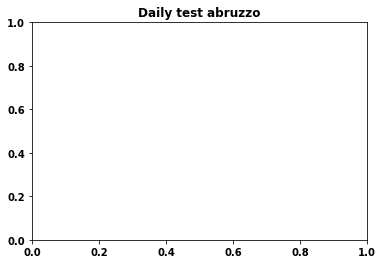

In [65]:

for region in italian_region_dataset_array:
    plt.title('Daily test ' + region)
    plt.bar(italian_region_dataset_array[region].date, italian_region_dataset_array[region].daily_test)
    plt.setp(plt.gca().xaxis.get_majorticklabels(),rotation=90)
    plt.xlabel('Date')
    plt.ylabel('Test')
    plt.show()
    
#plt.plot(country_dataset_array["united_kingdom"].daily_test)



In [55]:
country_dataset_array["united_kingdom"]

,total_cases,daily_cases,total_dead,daily_dead,total_test,daily_test
date,,,,,,
2020-01-24,0,0,0,0,2,2
2020-01-25,0,0,0,0,36,34
2020-01-26,0,0,0,0,58,22
2020-01-27,0,0,0,0,80,22
2020-01-28,0,0,0,0,108,28
...,...,...,...,...,...,...
2020-03-20,7966,1428,187,34,76342,3303
2020-03-21,10036,2070,244,57,83263,6921
2020-03-22,11366,1330,305,61,89503,6240
